In [1]:
import pandas as pd
import geopandas as gp
import os
import datetime as dt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("C:\\Users\\visitor\\Documents\\GitHub\\flora-biel-2022\\output\\data22.csv")
inv = pd.read_csv("C:\\Users\\visitor\\Documents\\GitHub\\flora-biel-2022\\output\\invasive_preproc.csv")

In [3]:
df['md'] = pd.to_datetime(df.md)
df['mydate'] = df.md.dt.date
mylist = []
invs = inv.slug.unique()

for i in df.slug:
    if i in invs:
        mylist.append(1)
    else:
        mylist.append(0)          
df["inv_stat"] = mylist

In [4]:
tina = gp.read_file("C:\\Users\\visitor\\Documents\\GitHub\\flora-biel-2022\\output\\trees_Areas.gpkg")

In [5]:
tina.nom = tina.nom.str.lower().str.replace(" ","")

In [6]:
keys = pd.read_csv("C:\\Users\\visitor\\Documents\\GitHub\\flora-biel-2022\\data\\surveys\\keys.csv", sep = ";")
keys.columns

Index(['current', 'past', 'year'], dtype='object')

In [7]:
keys.past = keys.past.str.lower().str.replace(" ","")
place_dict = dict(zip(keys.past,keys.current))

In [8]:
def places(x,my_dict):
    data = x
    if data in my_dict.keys():
        return my_dict[data]
    else:
        return data
def trees(x,my_dict):
        data = x
        if data in my_dict.keys():
            return my_dict[data]
        else:
            return "nan" 
df['locat'] = df.locality_descript.apply(lambda x: places(x,place_dict))
tree_dict = dict(zip(tina.nom,tina.NUMPOINTS))
area_dict = dict(zip(tina.nom,tina.area))

In [9]:
a = df.groupby('locat').agg({'slug':'nunique', 
                         'inv_stat':'sum', 
                         'mydate':'nunique'}).reset_index()

In [10]:
def trees(x,my_dict):
    data = x
    if data in my_dict.keys():
        return my_dict[data]
    else:
        return "nan" 

a['trees'] = a.locat.apply(lambda x: trees(x,tree_dict)) 
gs = a[a['trees']!='nan'].copy()

gs['area'] = gs.locat.apply(lambda x: trees(x,area_dict)).round()

In [11]:
gs.reset_index(inplace=True,drop = True)

In [12]:
gs.sort_values(by = ["area"])

,locat,slug,inv_stat,mydate,trees,area
54,ta153,4,0,2,0.0,17.0
68,ta2,6,0,1,0.0,17.0
47,ta147,3,0,1,0.0,18.0
82,ta37,4,1,1,1.0,20.0
74,ta3,5,0,2,0.0,26.0
...,...,...,...,...,...,...
43,ta143,7,0,1,13.0,3449.0
108,ta65,12,0,1,0.0,4380.0
138,ta98,15,0,1,23.0,5580.0
109,ta66,11,0,1,5.0,9404.0


<AxesSubplot:ylabel='area'>

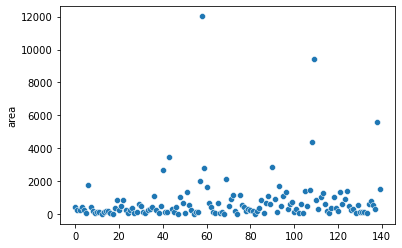

In [13]:
sns.scatterplot(data = gs.area)

In [14]:
gs.slug

0      11
1      11
2       5
3       5
4      12
       ..
135    12
136    12
137    15
138    15
139     8
Name: slug, Length: 140, dtype: int64

In [15]:
gs = gs[(gs.area < 2000) & (gs.slug > 5)]

In [16]:
gs.reset_index(inplace = True, drop = True)

<AxesSubplot:ylabel='trees'>

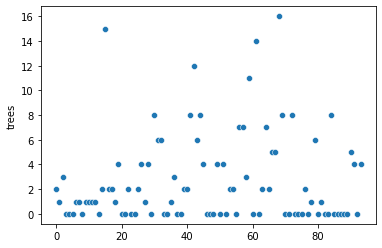

In [17]:
sns.scatterplot(data = gs.trees)

In [18]:
gs['tree_'] = gs.trees/gs.area
gs['inv_'] = gs.inv_stat/gs.slug
gs['slug_'] = gs.slug/gs.area
gs['area_'] = gs.area/gs.area.sum()
gsdata = gs[['slug_','inv_','tree_','area_']].copy()

<AxesSubplot:>

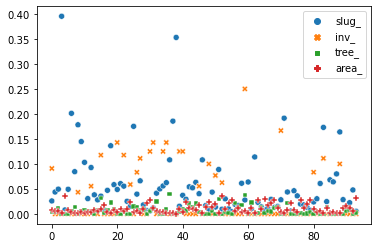

In [20]:
sns.scatterplot(data = gsdata)

<AxesSubplot:>

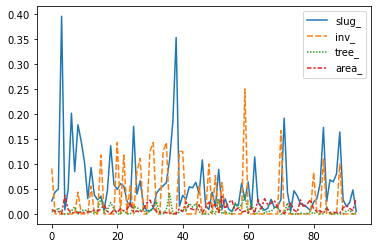

In [21]:
sns.lineplot(data = gsdata)

<AxesSubplot:>

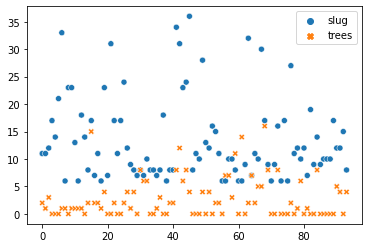

In [22]:
gsdata2 = gs[['slug','trees']]

sns.scatterplot(data = gsdata2)

<AxesSubplot:xlabel='trees', ylabel='slug'>

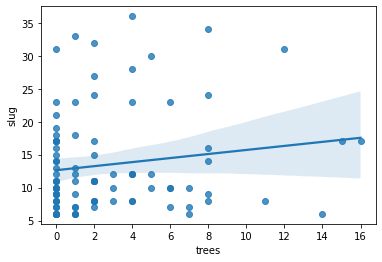

In [23]:
newdf = gs.astype({"trees":'float',"slug":'float'})

sns.regplot(x=newdf.trees,y=newdf.slug)

<AxesSubplot:xlabel='slug', ylabel='area'>

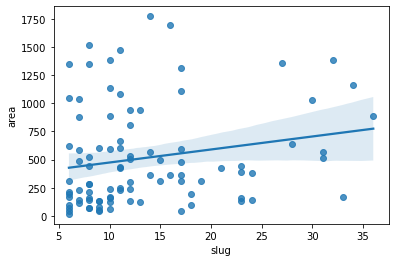

In [24]:
newdf2 = gs.astype({"area":'int',"slug":'int'})

sns.regplot(y=newdf2.area,x=newdf2.slug)